### 부스팅
* 약학습기의 시퀀셜한 연결
    - 병렬 연결(배깅): 랜덤 포레스트
* 매 단계를 넘어갈때 마다 에러 데이터에 가중치를 부여
* 매 스텝 진행시 가중치 있는 데이터 위주의 학습 모델 생성CART (Classification and Regression Trees)
* depth 가 얕은 학습기 위주로 생성

    - 단순분류: Adaboost 에이다 부스트
    - 오류의 GD:  GBM(Gradient Boost Mnachine)


In [5]:
folder='UCI HAR Dataset/'
fname=folder+'test/y_test.txt'
def getY(_fname):
    with open(_fname) as f:
        fread=f.read()
    flist=fread.strip().split('\n')
    print(_fname,"처리완료:",len(flist))
    return (flist)

In [6]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

UCI_HAR/train/y_train.txt 처리완료: 7352


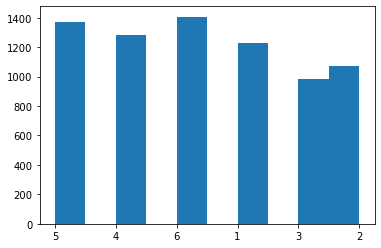

In [3]:
fname=folder+'train/y_train.txt'
flist=getY(fname)
plt.hist(flist)
plt.show()
# 라벨데이터가 균등하다-> 별도의 데이터 증폭 처리는 필요 없음
# 이산형 자료로 분류 모델에 적합하다
# 센서 데이터-> DT 사용 가능(확률적 센서 오류는 매우 적음)

In [7]:
import re
fname=folder+'test/X_test.txt'

def getX(_fname):
    with open(_fname) as f:
        fread=f.read()
    flist=fread.split('\n')
    res=[]
    for f in flist:
        freg=re.compile("\s+").split(f.strip())
        if(freg):
            res.append(freg)
    print(_fname,"처리완료:",len(res))
    return(res)

In [8]:
def getData():
    fname=folder+'test/X_test.txt'
    X_test=getX(fname)
    fname=folder+'test/y_test.txt'
    y_test=getY(fname)
    fname=folder+'train/X_train.txt'
    X_train=getX(fname)
    fname=folder+'train/y_train.txt'
    y_train=getY(fname)
    return (X_train,X_test,y_train,y_test)

In [9]:
X_train,X_test,y_train,y_test=getData()

UCI HAR Dataset/test/X_test.txt 처리완료: 2948
UCI HAR Dataset/test/y_test.txt 처리완료: 2947
UCI HAR Dataset/train/X_train.txt 처리완료: 7353
UCI HAR Dataset/train/y_train.txt 처리완료: 7352


In [10]:
X_test=X_test[:2947]

X_train=X_train[:7352]
print(len(X_train),len(X_test))

7352 2947


In [11]:
coldf=pd.read_csv(folder+'features.txt',
                  sep='\s+',
                  header=None,
                  names=['idx','cname']).set_index('idx')

coldf.head()

,cname
idx,
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y


In [12]:
Xtraindf=pd.DataFrame(data=X_train,columns=coldf['cname'].values).fillna(0)
Xtraindf.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
1,2.7841883e-001,-1.6410568e-002,-1.2352019e-001,-9.9824528e-001,-9.7530022e-001,-9.6032199e-001,-9.9880719e-001,-9.7491437e-001,-9.5768622e-001,-9.4306751e-001,...,1.5807454e-001,-5.9505094e-001,-8.6149931e-001,5.3476955e-002,-7.4345661e-003,-7.3262621e-001,7.0351059e-001,-8.4478760e-001,1.8028889e-001,-5.4316717e-002
2,2.7965306e-001,-1.9467156e-002,-1.1346169e-001,-9.9537956e-001,-9.6718701e-001,-9.7894396e-001,-9.9651994e-001,-9.6366837e-001,-9.7746859e-001,-9.3869155e-001,...,4.1450281e-001,-3.9074815e-001,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002
3,2.7917394e-001,-2.6200646e-002,-1.2328257e-001,-9.9609149e-001,-9.8340270e-001,-9.9067510e-001,-9.9709947e-001,-9.8274984e-001,-9.8930250e-001,-9.3869155e-001,...,4.0457253e-001,-1.1729020e-001,-4.8284451e-001,-3.6787973e-002,-1.2892494e-002,6.4001104e-001,-4.8536645e-001,-8.4864938e-001,1.8193476e-001,-4.7663183e-002
4,2.7662877e-001,-1.6569655e-002,-1.1536185e-001,-9.9813862e-001,-9.8081727e-001,-9.9048163e-001,-9.9832113e-001,-9.7967187e-001,-9.9044113e-001,-9.4246912e-001,...,8.7753013e-002,-3.5147093e-001,-6.9920515e-001,1.2332005e-001,1.2254196e-001,6.9357829e-001,-6.1597061e-001,-8.4786525e-001,1.8515116e-001,-4.3892254e-002


In [13]:
X_train=X_train[:7352]
print(len(X_train),len(y_train))

7352 7352


### GBM 
* Gradient Boosting Macine
* GD 활용 부스팅
    - Adaboost 대비 속도 빠름
    - 과적합 문제 있음
    - 랜덤포레스트보다 속도 느림: 시퀀셜

In [16]:
#매우 느려!!
from sklearn.ensemble import GradientBoostingClassifier
gbmclf=GradientBoostingClassifier(random_state=1)
gbmclf.fit(X_train,y_train)


KeyboardInterrupt: 

In [ ]:
pred=gbmclf.predict(X_test)
acc=accuracy_score(y_test,pred)

In [21]:
acc

0.9389209365456397

### XGBoost
* GBM 의 단점을 보완 속도우선 RandomForest>>XGBoost>GBM
* 과적합 방지기능
* 긍정이득이 없는 경우 자체 가지치기기능
* 자체 내장 cv 교차검정
* 결손 자체 처리


In [42]:
nX_train=np.array(X_train)
ny_train=np.array(y_train)
nX_test=np.array(X_test)
ny_test=np.array(y_test)

In [43]:
print(len(nX_train),len(ny_train),len(nX_test),len(ny_test))

7352 7352 2947 2947


In [55]:
from xgboost import XGBClassifier
xgbclf=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
evals=[(nX_test,ny_test)]
xgbclf.fit(nX_train,ny_train,
           early_stopping_rounds=100,
           eval_metric="mlogloss",
           eval_set=evals,
           verbose=True
          )


C:\Users\690\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.58932
[1]	validation_0-mlogloss:1.43266
[2]	validation_0-mlogloss:1.30322
[3]	validation_0-mlogloss:1.19383
[4]	validation_0-mlogloss:1.10067
[5]	validation_0-mlogloss:1.01957
[6]	validation_0-mlogloss:0.94662
[7]	validation_0-mlogloss:0.88249
[8]	validation_0-mlogloss:0.82727
[9]	validation_0-mlogloss:0.77601
[10]	validation_0-mlogloss:0.72925
[11]	validation_0-mlogloss:0.68936
[12]	validation_0-mlogloss:0.65128
[13]	validation_0-mlogloss:0.61844
[14]	validation_0-mlogloss:0.58748
[15]	validation_0-mlogloss:0.55894
[16]	validation_0-mlogloss:0.53410
[17]	validation_0-mlogloss:0.50956
[18]	validation_0-mlogloss:0.48868
[19]	validation_0-mlogloss:0.46809
[20]	validation_0-mlogloss:0.45075
[21]	validation_0-mlogloss:0.43385
[22]	validation_0-mlogloss:0.41768
[23]	validation_0-mlogloss:0.40316
[24]	validation_0-mlogloss:0.38937
[25]	validation_0-mlogloss:0.37645
[26]	validation_0-mlogloss:0.36394
[27]	validation_0-mlogloss:0.35407
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
xg100pred=xgbclf.predict(nX_test)

In [48]:
xg100pred

array(['5', '5', '5', ..., '2', '2', '2'], dtype='<U1')

In [51]:
accuracy_score(xg100pred,y_test)

0.9494401085850017

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

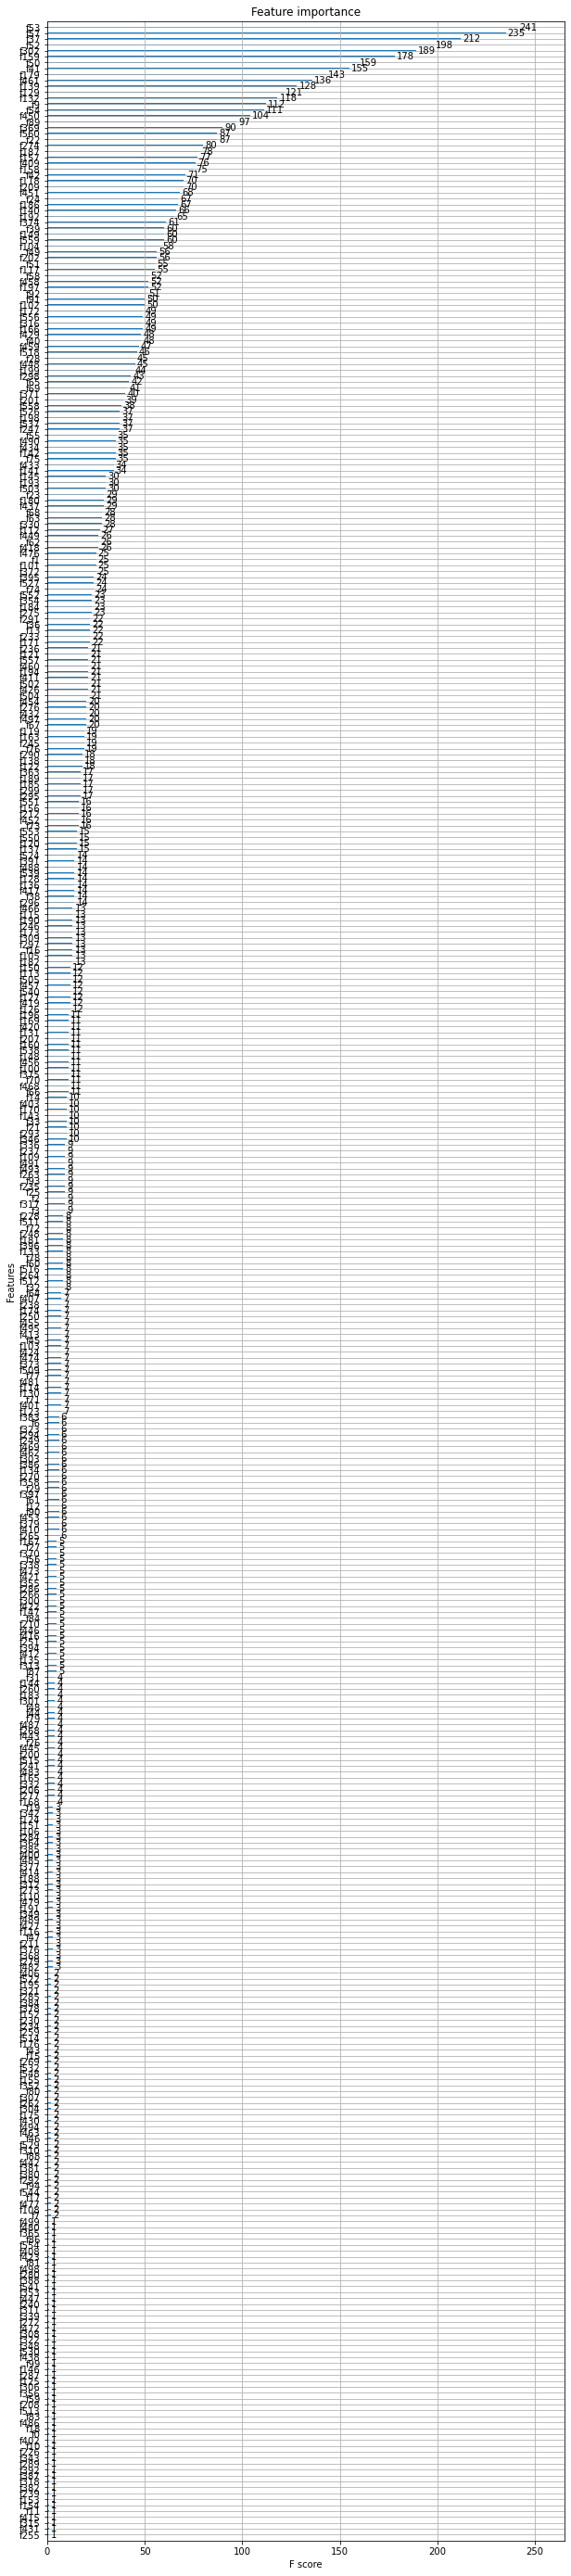

In [54]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig,ax =plt.subplots(figsize=(10,50))
plot_importance(xgbclf,ax=ax)


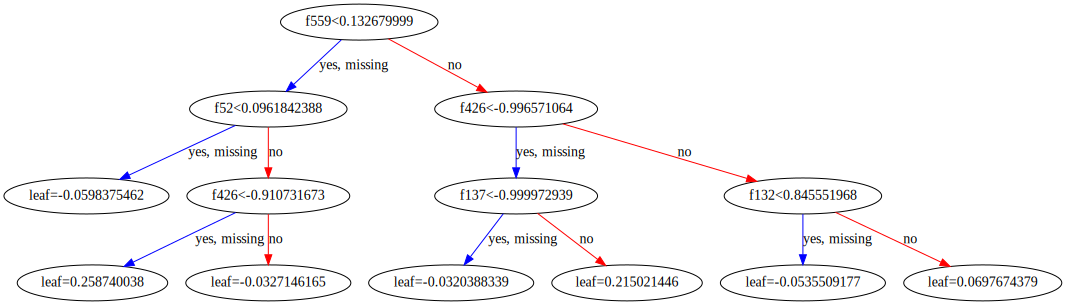

In [57]:
xgb.to_graphviz(xgbclf, num_trees=3)

<AxesSubplot:>

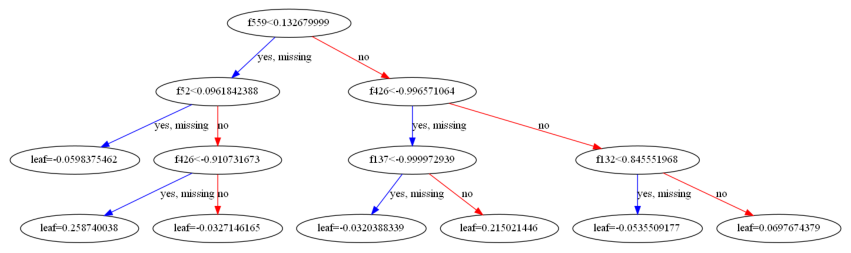

In [63]:
fig,ax1 =plt.subplots(figsize=(15,15))
xgb.plot_tree(xgbclf, num_trees=3, ax=ax1)

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_params = {'max_depth': [3,5,7], 
              'subsample': [0.6, 0.8, 1.0]}
xgbgrid=GridSearchCV(xgbclf,
            param_grid=xgb_params,
            scoring='roc_auc',
            n_jobs=8,
            cv=5,
            refit=True, 
            return_train_score=True
            )
xgbgrid.fit(X_train, y_train)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()